In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
train_df = pd.read_csv('/mnt/c/Users/11351/Desktop/patch_set_1150_224/train_meta.csv')
test_df = pd.read_csv('/mnt/c/Users/11351/Desktop/patch_set_1150_224/test_meta.csv')

In [10]:
train_df.pathology.unique()

array(['MALIGNANT', 'NORMAL', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'],
      dtype=object)

In [14]:
train_num_bkg = len(train_df[(train_df.type=='bkg')])
train_num_ca = len(train_df[(train_df.type=='calcification')])
train_num_ms = len(train_df[(train_df.type=='mass')])
train_num_ma_ca = len(train_df[(train_df.type=='calcification')&(train_df.pathology=='MALIGNANT')])
train_num_ma_ms = len(train_df[(train_df.type=='mass')&(train_df.pathology=='MALIGNANT')])
train_num_be_ca = train_num_ca - train_num_ma_ca
train_num_be_ms = train_num_ms - train_num_ma_ms

test_num_bkg = len(test_df[(test_df.type=='bkg')])
test_num_ca = len(test_df[(test_df.type=='calcification')])
test_num_ms = len(test_df[(test_df.type=='mass')])
test_num_ma_ca = len(test_df[(test_df.type=='calcification')&(test_df.pathology=='MALIGNANT')])
test_num_ma_ms = len(test_df[(test_df.type=='mass')&(test_df.pathology=='MALIGNANT')])
test_num_be_ca = test_num_ca - test_num_ma_ca
test_num_be_ms = test_num_ms - test_num_ma_ms


In [29]:
def plot_bar_chart(label_list,objs,total_width = 0.8, xlabel = None, ylabel = None, title = None):
  x = np.arange(len(label_list))
  n = len(objs)
  width = total_width / n
  x = x - (total_width - width) / 2
  for idx,obj in enumerate(objs):
    plt.bar(x + idx*width, obj['ary'],  width=width, label=obj['label'])
  plt.xticks(x,label_list)
  if xlabel is not None:
    plt.xlabel(xlabel)
  if ylabel is not None:
    plt.ylabel(ylabel)
  if title is not None:
    plt.title(title)
  plt.legend()
  plt.show()

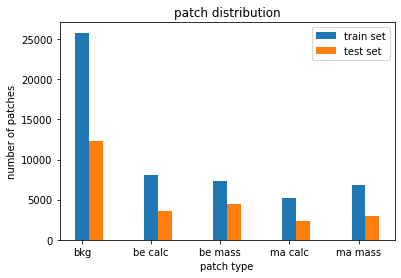

In [34]:
label_list = ['bkg','be calc','be mass','ma calc','ma mass']
train = {
    'ary':[train_num_bkg,train_num_be_ca,train_num_be_ms,train_num_ma_ca,train_num_ma_ms],
    'label':'train set'
}
test = {
    'ary':[test_num_bkg,test_num_be_ca,test_num_be_ms,test_num_ma_ca,test_num_ma_ms],
    'label':'test set'
}
plot_bar_chart(label_list,[train, test],total_width = 0.4,xlabel="patch type",ylabel="number of patches", title = "patch distribution")